# Project Module 1

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_mcc = pd.read_csv('mcc_codes.csv')
df_fraud = pd.read_csv('train_fraud_labels.csv')

## Cards data

In [3]:
#read data
df_card = pd.read_csv('cards_data.csv')
df_card.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


card_type
Credit             2057
Debit              3511
Debit (Prepaid)     578
dtype: int64
card_brand
Amex           402
Discover       209
Mastercard    3209
Visa          2326
dtype: int64
has_chip
NO      646
YES    5500
dtype: int64
num_cards_issued
1    3114
2    2972
3      60
dtype: int64


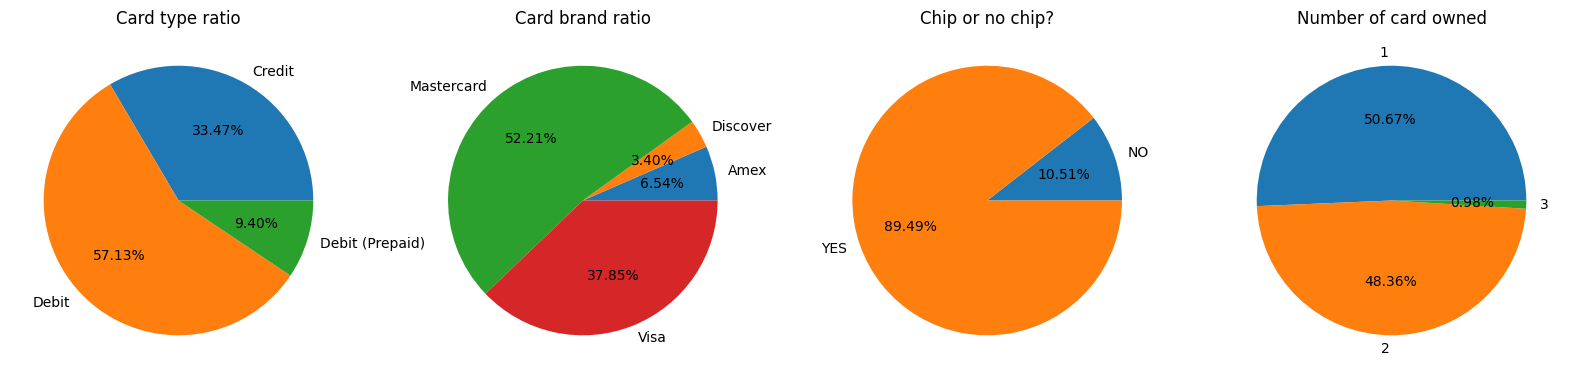

In [191]:
#Which card type is most popular?
card_type = df_card.groupby(['card_type']).size()
print(card_type)

#Which card brand is most popular?
card_brand = df_card.groupby(['card_brand']).size()
print(card_brand)

#Ratio between chip card and normal card
has_chip = df_card.groupby(['has_chip']).size()
print(has_chip)

#Check how many client has more than 1 card
num_cards = df_card.groupby(['num_cards_issued']).size()
print(num_cards)

#draw pie chart
plt.figure(figsize=(20, 10))
#card type
plt.subplot(1,4,1)
card_type.plot(kind='pie',autopct='%1.2f%%')
plt.title('Card type ratio')
#card brand
plt.subplot(1,4,2)
card_brand.plot(kind='pie',autopct='%1.2f%%')
plt.title('Card brand ratio')
#chip or not
plt.subplot(1,4,3)
has_chip.plot(kind='pie',autopct='%1.2f%%')
plt.title('Chip or no chip?')
#number of card
plt.subplot(1,4,4)
num_cards.plot(kind='pie',autopct='%1.2f%%')
plt.title('Number of card owned')

plt.show()

C:\Users\ASUS-PRO\AppData\Local\Temp\ipykernel_26484\494907107.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_card['acct_open_date'] = pd.to_datetime(df_card['acct_open_date'])


open_year
1991       3
1992       2
1993       3
1994      10
1995       6
1996      16
1997      27
1998      42
1999      61
2000      64
2001     121
2002     147
2003     197
2004     246
2005     300
2006     359
2007     408
2008     487
2009     466
2010     545
2011     335
2012     188
2013     199
2014     178
2015     148
2016     120
2017     101
2018     101
2019      88
2020    1178
dtype: int64
open_month
1      958
2     1044
3      390
4      398
5      414
6      442
7      437
8      403
9      442
10     418
11     401
12     399
dtype: int64


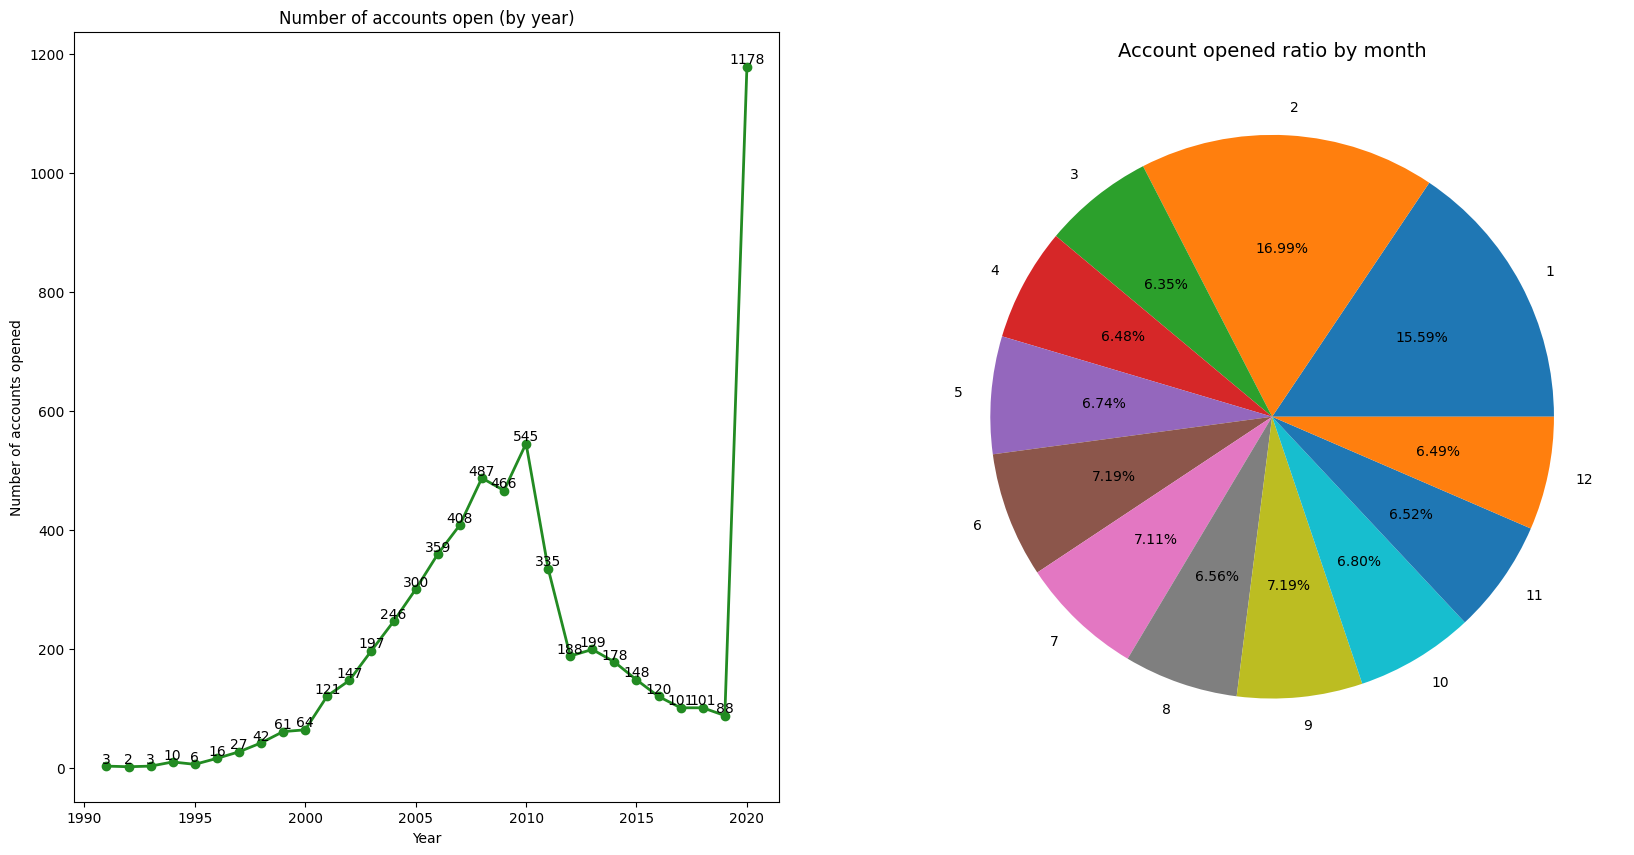

In [192]:
#Which year did ppl open most account and which month of the year ppl tend to open account?
#Convert data to datetime format
df_card['acct_open_date'] = pd.to_datetime(df_card['acct_open_date'])

#Separate year and month
df_card['open_year'] = df_card['acct_open_date'].dt.year
df_card['open_month'] = df_card['acct_open_date'].dt.month

#group account by year opened
yearly_counts = df_card.groupby('open_year').size()
print(yearly_counts)

#group account by month opened
monthly_counts = df_card.groupby('open_month').size()
print(monthly_counts)

plt.figure(figsize=(20, 10))

#draw line chart
plt.subplot(1,2,1)
yearly_counts.plot(kind='line', marker='o', color='forestgreen', linewidth=2)
plt.title('Number of accounts open (by year)')
plt.xlabel('Year')
plt.ylabel('Number of accounts opened')
for x, y in zip(yearly_counts.index, yearly_counts.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

#draw pie chart
plt.subplot(1,2,2)
monthly_counts.plot(kind='pie',autopct='%1.2f%%' )
plt.title('Account opened ratio by month', fontsize=14)

plt.show()

In [193]:
#Process data, delete '$' symbol and turn into float type
df_card['credit_limit'] = df_card['credit_limit'].str.replace('$','').astype(float)

C:\Users\ASUS-PRO\AppData\Local\Temp\ipykernel_26484\2333223334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='card_brand', y='credit_limit', data=df_card, palette='Set2')


Text(0.5, 1.0, 'Relationship between card brand and credit limit')

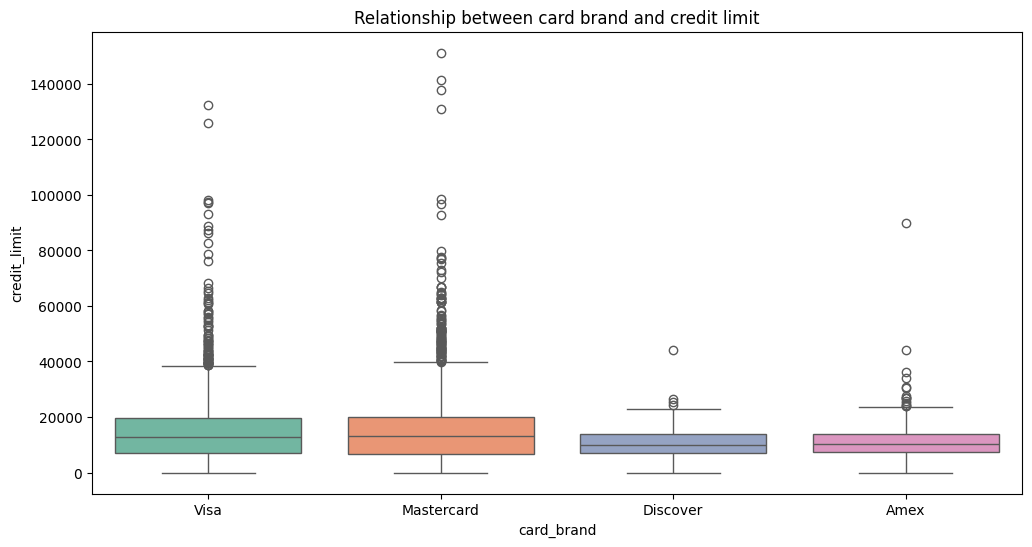

In [194]:
#relation between credit limit and card brand
plt.figure(figsize=(12, 6))

sns.boxplot(x='card_brand', y='credit_limit', data=df_card, palette='Set2')
plt.title('Relationship between card brand and credit limit')


## Transaction data

In [195]:
#read data
df_transaction = pd.read_csv('transactions_data.csv')

In [196]:
df_transaction.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


Text(0.5, 1.0, 'Kind of transaction')

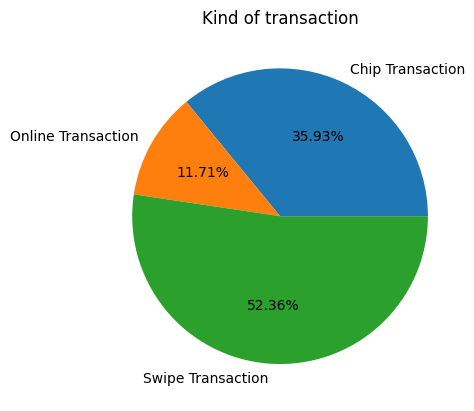

In [202]:
# Ratio btween kinds of transaction
trans_type = df_transaction.groupby(['use_chip']).size()
trans_type.plot(kind='pie',autopct='%1.2f%%')
plt.title('Kind of transaction')

In [198]:
# Convert to datetime format
df_transaction['date'] = pd.to_datetime(df_transaction['date'])
# Separate time
df_transaction['hour'] = df_transaction['date'].dt.hour

Text(0.5, 1.0, 'Number of transactions during a day')

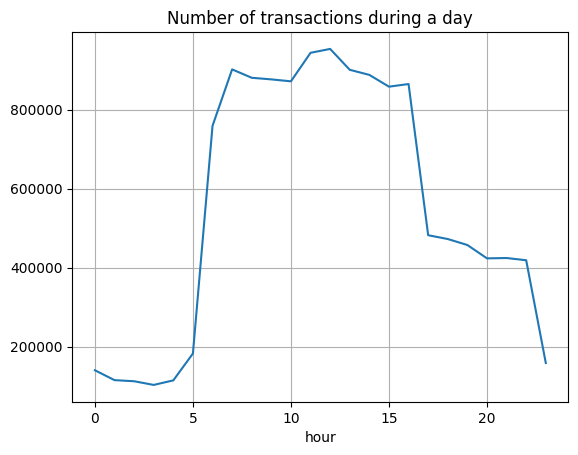

In [199]:
#Which time of the day has most transaction
hourly_dist = df_transaction.groupby('hour').size()
hourly_dist.plot(kind='line')
plt.grid()
plt.title('Number of transactions during a day')

In [200]:
# Convert amount data to float type
df_transaction['amount'] = df_transaction['amount'].str.replace('$', '').astype(float)

In [201]:
#Total amount, mean, min, max of transaction
#Separate transactions to 2 category: spend and receive
df_receive = df_transaction[df_transaction['amount'] > 0]
df_spend = df_transaction[df_transaction['amount'] < 0]
df_spend['amount'] = df_spend['amount'] * -1

stats_receive = df_receive['amount'].describe()
stats_spend = df_spend['amount'].describe()

summary_table = pd.DataFrame({
    'Receive Transaction (+)': stats_receive,
    'Spend Transaction (-)': stats_spend
})

print(summary_table)

C:\Users\ASUS-PRO\AppData\Local\Temp\ipykernel_26484\3831664254.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spend['amount'] = df_spend['amount'] * -1


       Receive Transaction (+)  Spend Transaction (-)
count             1.263523e+07          660049.000000
mean              5.060096e+01             102.293985
std               7.404347e+01              84.956776
min               1.000000e-02               0.010000
25%               1.107000e+01              64.000000
50%               3.192000e+01              79.000000
75%               6.640000e+01              93.000000
max               6.820200e+03             500.000000


## User data

In [203]:
#read data
df_user = pd.read_csv('users_data.csv')
df_user.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [204]:
#Process datatype
df_user['yearly_income'] = df_user['yearly_income'].str.replace('$', '').astype(float)

In [205]:
df_user['total_debt'] = df_user['total_debt'].str.replace('$', '').astype(float)

Text(0.5, 1.0, 'credit_score distribution')

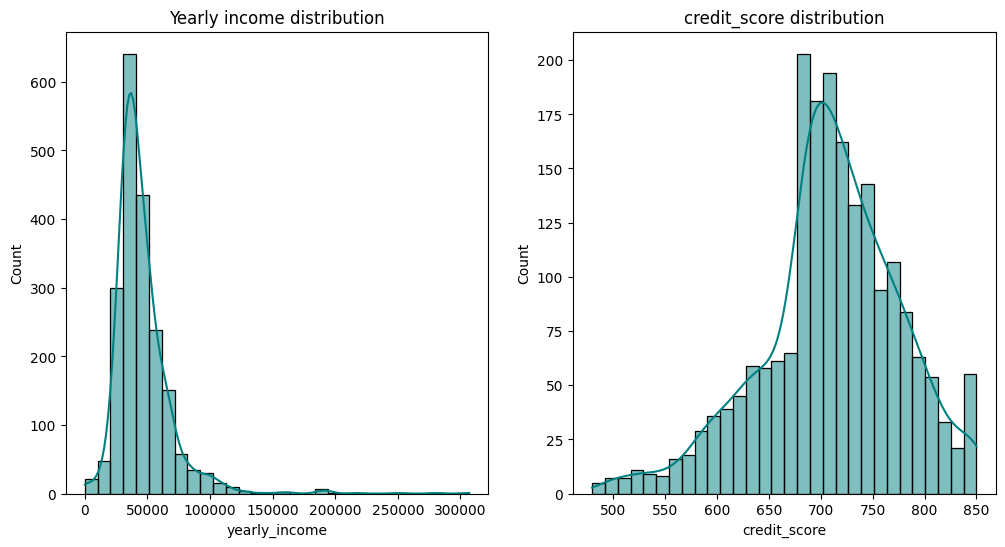

In [ ]:
#Yearly income distribution

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df_user['yearly_income'], kde=True, color='teal', bins=30)
plt.title('Yearly income distribution')
plt.subplot(1,2,2)
sns.histplot(df_user['credit_score'], kde=True, color='teal', bins=30)
plt.title('credit_score distribution')

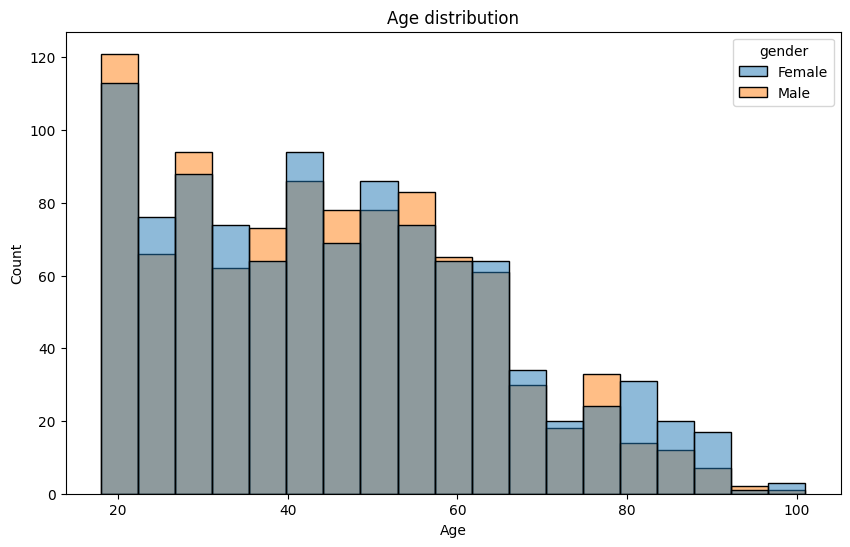

In [207]:
#Gender and age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_user, x='current_age', hue='gender')

plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

In [211]:
# Describe income by gender
income_comparison = df_user.groupby('gender')['yearly_income'].describe().round(2)

#caculate ratio btween mean income male and female
mean_diff = income_comparison.loc['Male', 'mean'] / income_comparison.loc['Female', 'mean']
print('Income by gender:')
print(income_comparison)
print(f'Male income equal {mean_diff:.2f} time female income.')

Income by gender:
         count      mean       std  min       25%      50%       75%       max
gender                                                                        
Female  1016.0  46048.31  24709.17  1.0  32785.50  40857.5  52913.25  307018.0
Male     984.0  45372.64  21081.21  2.0  32883.75  40500.0  52326.00  216740.0
Male income equal 0.99 time female income.
